1. load data:

Data source: Kaggle

Data link: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn/data

# what is chrun anyway?

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_file_path = '/content/drive/MyDrive/customer chrun prediction/Customer-Churn-Records.csv'

In [4]:
import pandas as pd
import numpy as np

data = pd.read_csv(data_file_path)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


2. data exploration

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

the dataset contains 10000 samples, 17 features, 1 Label. From data, Exited is the label.

2.1 check data balance:

In [6]:
n = data['Exited'].value_counts()
print(n)

Exited
0    7962
1    2038
Name: count, dtype: int64


The data is not balanced

2.2 unique values:

In [7]:
data.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


2.3 feature exploration:

based on the data card on kaggle:

RowNumber—corresponds to the record (row) number and has no effect on the output.
CustomerId—contains random values and has no effect on customer leaving the bank.

Surname—the surname of a customer has no impact on their decision to leave the bank.

CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

Geography—a customer’s location can affect their decision to leave the bank.


Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.

Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

NumOfProducts—refers to the number of products that a customer has purchased through the bank.

HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

IsActiveMember—active customers are less likely to leave the bank.

EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

Exited—whether or not the customer left the bank.

Complain—customer has complaint or not.
Satisfaction Score—Score provided by the customer for their complaint resolution.
Card Type—type of card hold by the customer.

Points Earned—the points earned by the customer for using credit card.

can make a conclusion:

1. contunuous data (x): CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary, Points Earned

2. discrete data (x): Geography,Gender, HasCrCard, IsActiveMember, Complain

3. unrelevent data (x): RowNumber , CustomerId , Surname

4. (y): Exited (discrete data)

In [9]:
data[["CreditScore","Age","Tenure", "Balance", "NumOfProducts", "EstimatedSalary",]].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


# esimated salary is weried.

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

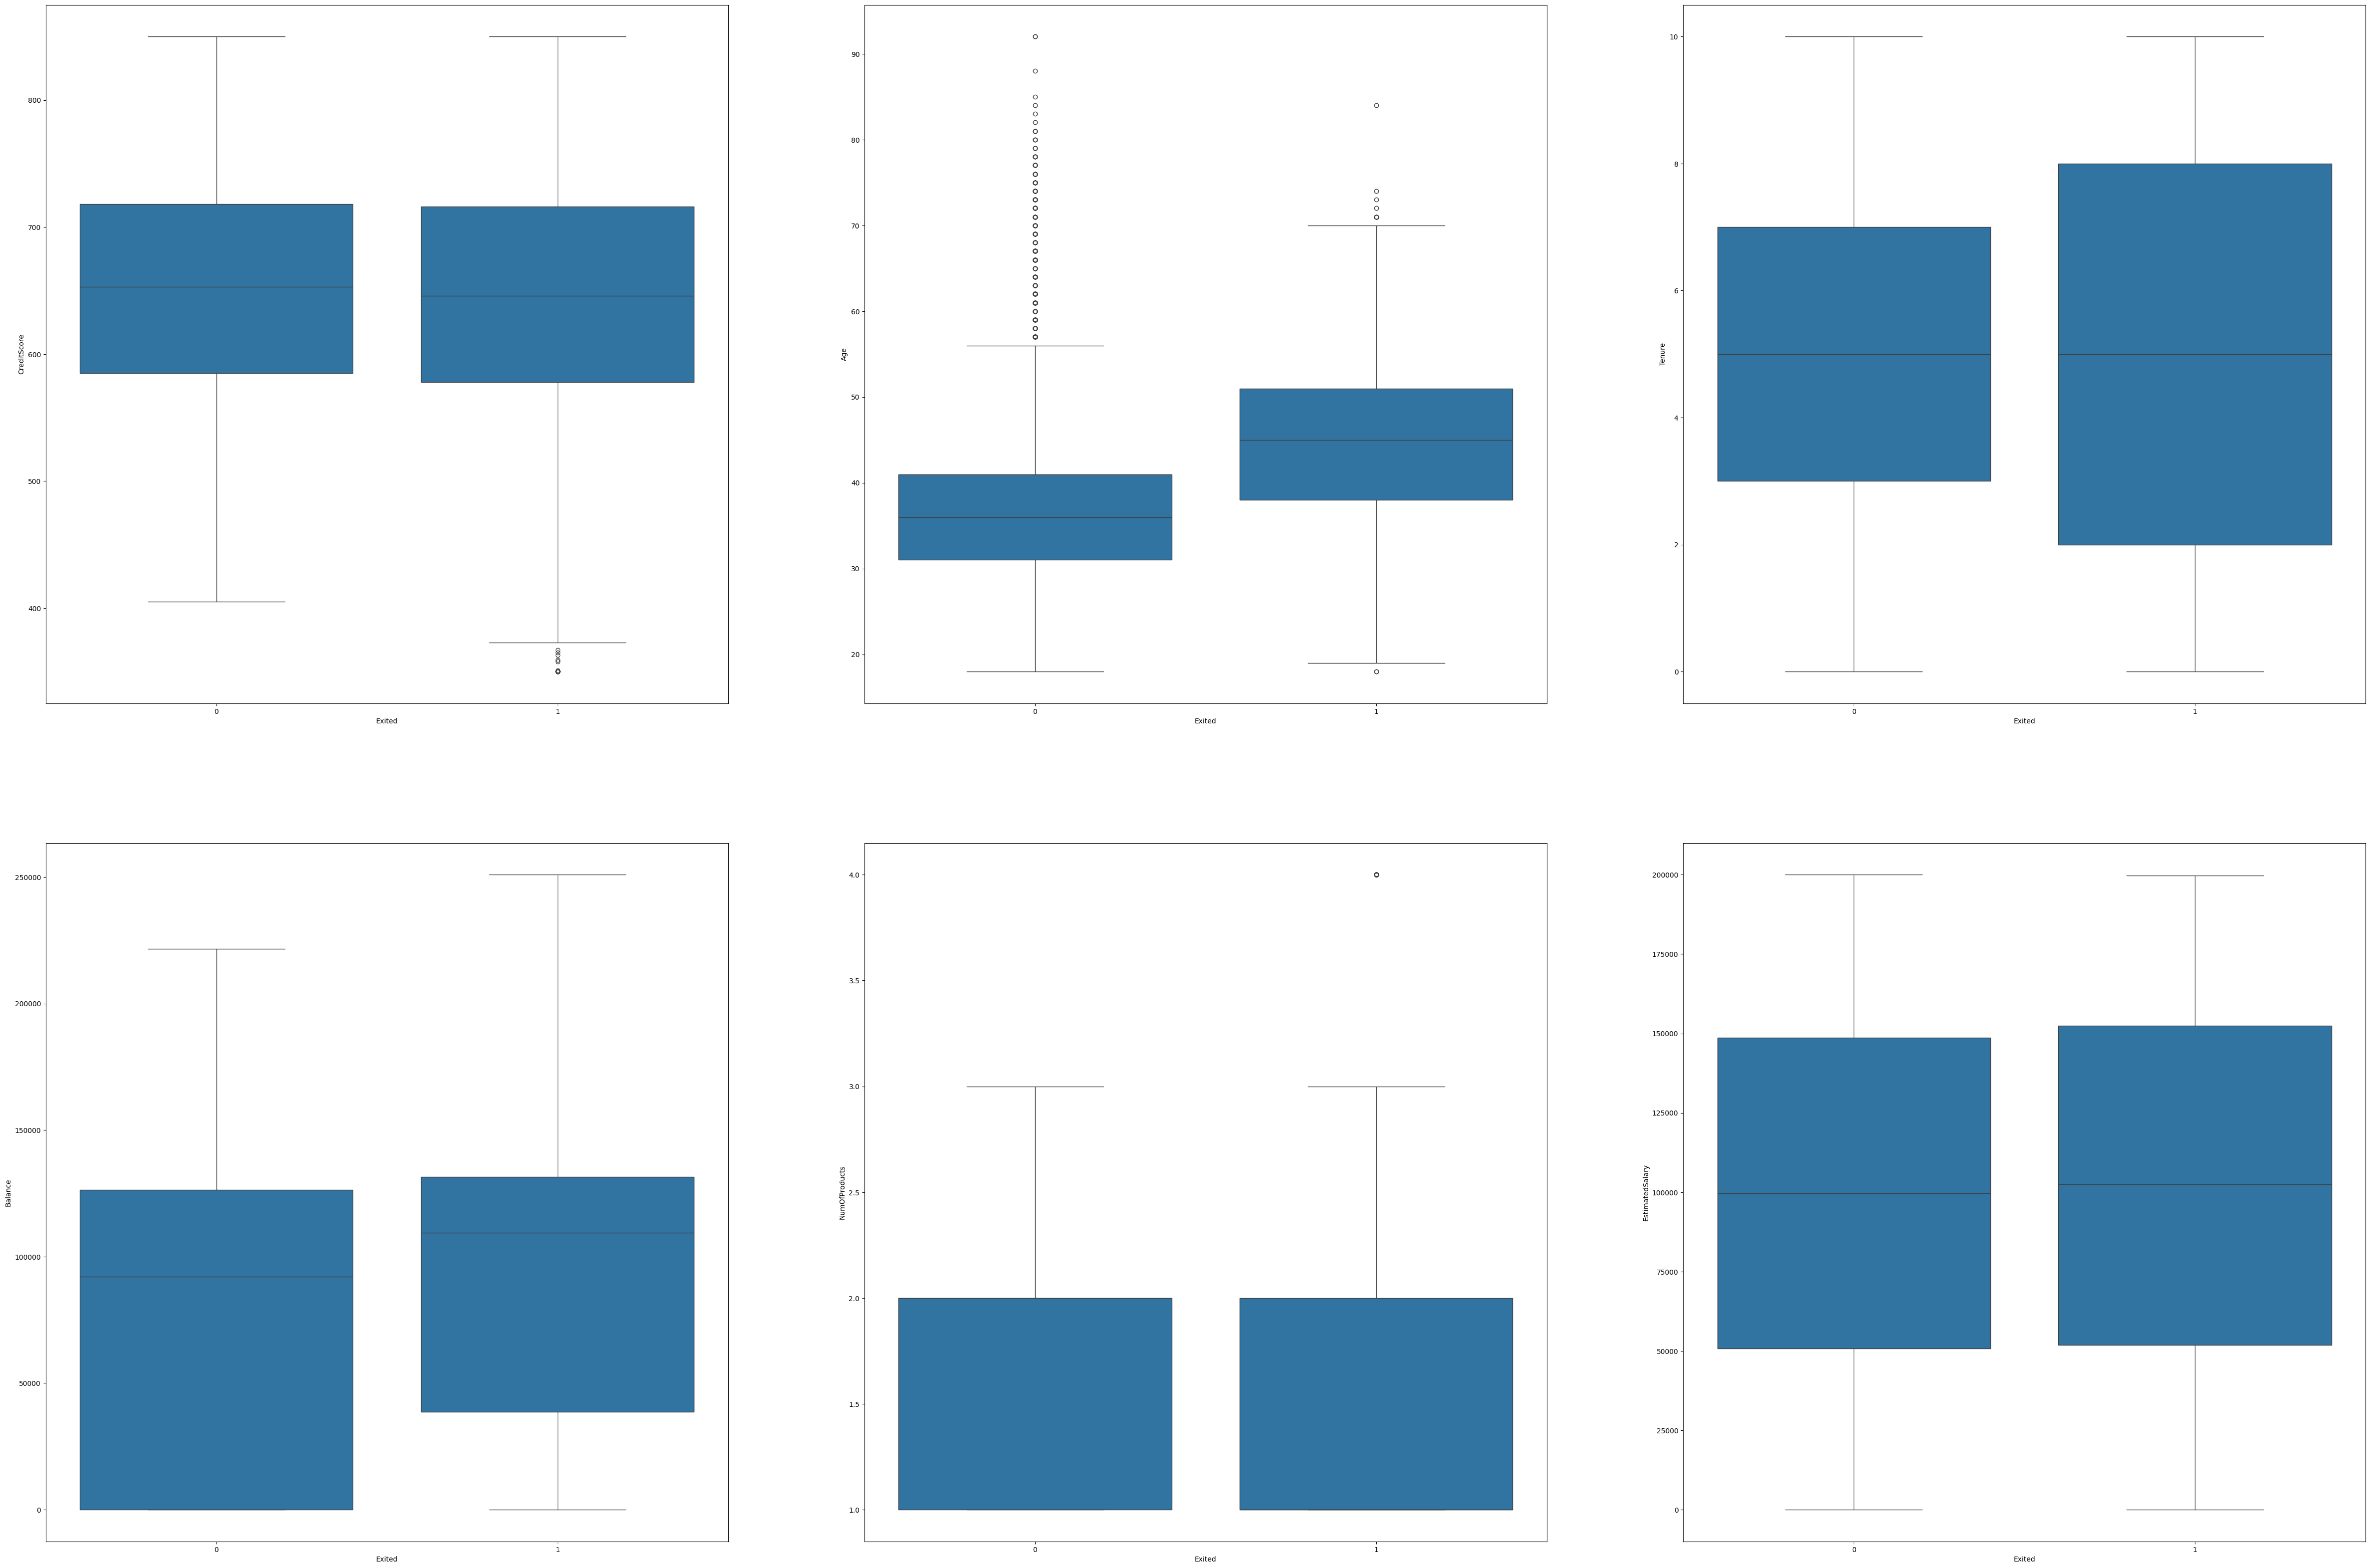

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
_,axss = plt.subplots(2,3, figsize=[60,40])
sns.boxplot(data=data, x="Exited",y = "CreditScore", ax=axss[0,0])
sns.boxplot(data=data, x="Exited",y = "Age", ax=axss[0,1])
sns.boxplot(data=data, x="Exited",y = "Tenure", ax=axss[0,2])
sns.boxplot(data=data, x="Exited",y = "Balance", ax=axss[1,0])
sns.boxplot(data=data, x="Exited",y = "NumOfProducts", ax=axss[1,1])
sns.boxplot(data=data, x="Exited",y = "EstimatedSalary", ax=axss[1,2])
#sns.boxplot(data=data, x="Exited",y = "Point Earned", ax=axss[2,0])

# what make the biggest impact to the model?

age,

<Axes: xlabel='Exited', ylabel='count'>

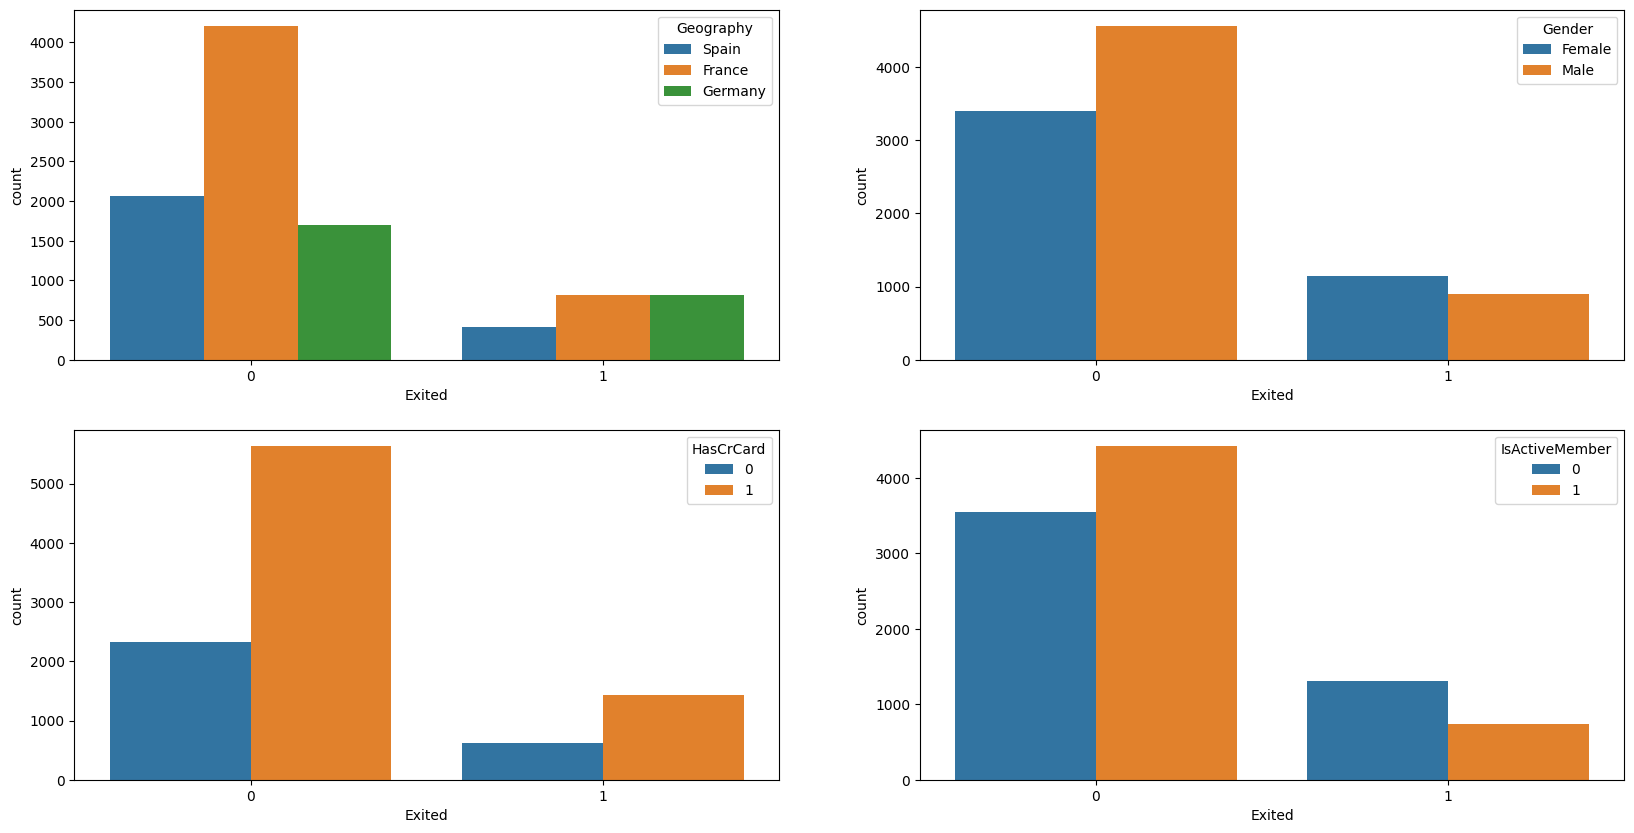

In [13]:
_,axss = plt.subplots(2,2, figsize=[20,10])
sns.countplot(x='Exited', hue='Geography', data=data, ax=axss[0][0])
sns.countplot(x='Exited', hue='Gender', data=data, ax=axss[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data=data, ax=axss[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data=data, ax=axss[1][1])
#sns.countplot(x='Exited', hue='Complain', data=data, ax=axss[1][1])

# isActiveMember is acting differently in exited 0 and 1

3. data preprocessing

In [40]:
Y = data['Exited']
x_drop_para = ["RowNumber", "CustomerId", "Surname", "Exited", 'Point Earned', 'Card Type', 'Complain','Satisfaction Score']
# x_drop_para = ["RowNumber", "CustomerId", "Surname", "Exited",]
X = data.drop(x_drop_para, axis=1)

In [41]:
X.head() # has four more features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [42]:
Y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [43]:
cat_cols = X.columns[X.dtypes == 'object']
num_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')] # 只有0和1，可以当作num


In [44]:
num_cols

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [45]:
cat_cols

Index(['Geography', 'Gender'], dtype='object')

In [46]:
data[cat_cols].nunique()

,0
Geography,3
Gender,2


In [47]:
cat_cols = cat_cols.tolist()
num_cols = num_cols.tolist()
print(cat_cols)
print(num_cols)

['Geography', 'Gender']
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [49]:
#wrong_cols = ['IsActiveMember', 'HasCrCard', 'Complain']
"""wrong_cols = ['IsActiveMember']
for col in wrong_cols:
  cat_cols.append(col)

for col in wrong_cols:
  num_cols.remove(col)

cat_cols = pd.Index(cat_cols)
num_cols = pd.Index(num_cols)"""

"wrong_cols = ['IsActiveMember']\nfor col in wrong_cols:\n  cat_cols.append(col)\n\nfor col in wrong_cols:\n  num_cols.remove(col)\n\ncat_cols = pd.Index(cat_cols)\nnum_cols = pd.Index(num_cols)"

In [50]:
print(cat_cols)
print(num_cols)

['Geography', 'Gender']
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


Split data:

In [51]:
from sklearn import model_selection

In [52]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, stratify = Y, random_state = 143)
# stratify = Y: 保证见过0和1
print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 8000 observation with 10 features
test data has 2000 observation with 10 features


In [53]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
3766,584,Spain,Male,36,4,82696.09,2,0,0,83058.14
3475,769,France,Male,31,4,61297.05,2,1,1,7118.02
8562,697,France,Male,63,7,148368.02,1,0,0,118862.08
9054,546,France,Female,30,5,0.00,2,0,1,198543.09
5360,633,France,Male,35,10,0.00,2,1,0,65675.47


In [54]:
from sklearn.preprocessing import OneHotEncoder

In [55]:
def OneHotEncoding(df, enc, categories):
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns = enc.get_feature_names_out(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

In [56]:
#categories = ['Geography','Card Type']
categories = ['Geography']
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[categories])
X_train = OneHotEncoding(X_train, enc_ohe, categories)
X_test = OneHotEncoding(X_test, enc_ohe, categories)

In [57]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,584,Male,36,4,82696.09,2,0,0,83058.14,0.0,0.0,1.0
1,769,Male,31,4,61297.05,2,1,1,7118.02,1.0,0.0,0.0
2,697,Male,63,7,148368.02,1,0,0,118862.08,1.0,0.0,0.0
3,546,Female,30,5,0.00,2,0,1,198543.09,1.0,0.0,0.0
4,633,Male,35,10,0.00,2,1,0,65675.47,1.0,0.0,0.0


In [58]:
# Ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
categories = ['Gender']
enc_oe = OrdinalEncoder()
enc_oe.fit(X_train[categories])
X_train[categories] = enc_oe.transform(X_train[categories])
X_test[categories] = enc_oe.transform(X_test[categories])

In [59]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,584,1.0,36,4,82696.09,2,0,0,83058.14,0.0,0.0,1.0
1,769,1.0,31,4,61297.05,2,1,1,7118.02,1.0,0.0,0.0
2,697,1.0,63,7,148368.02,1,0,0,118862.08,1.0,0.0,0.0
3,546,0.0,30,5,0.00,2,0,1,198543.09,1.0,0.0,0.0
4,633,1.0,35,10,0.00,2,1,0,65675.47,1.0,0.0,0.0


Normalize Data:

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [61]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,-0.682095,1.0,-0.274418,-0.361047,0.098170,0.807799,-1.550099,-1.032787,-0.295508,0.0,0.0,1.0
1,1.224158,1.0,-0.752248,-0.361047,-0.245002,0.807799,0.645120,0.968254,-1.619043,1.0,0.0,0.0
2,0.482265,1.0,2.305864,0.677315,1.151336,-0.905455,-1.550099,-1.032787,0.328508,1.0,0.0,0.0
3,-1.073649,0.0,-0.847814,-0.014926,-1.228009,0.807799,-1.550099,0.968254,1.717242,1.0,0.0,0.0
4,-0.177195,1.0,-0.369984,1.715678,-1.228009,0.807799,0.645120,-1.032787,-0.598465,1.0,0.0,0.0


Model training

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
classifier_logistic = LogisticRegression()
classifier_KNN = KNeighborsClassifier()
classifier_RF = RandomForestClassifier()

In [69]:
from sklearn.metrics import accuracy_score
classifier_logistic.fit(X_train, y_train)
y_test_LG = classifier_logistic.predict(X_test)
print(f"accuracy score for logistic regression is {accuracy_score(y_test, y_test_LG)}")

accuracy score for logistic regression is 0.8135


In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix_LG = confusion_matrix(y_test, y_test_LG)
print(confusion_matrix_LG)

[[1537   55]
 [ 318   90]]


In [70]:
classifier_KNN.fit(X_train, y_train)
y_test_KNN = classifier_KNN.predict(X_test)
print(f"accuracy score for KNN is {accuracy_score(y_test, y_test_KNN)}")

accuracy score for KNN is 0.836


In [71]:
confusion_matrix_KNN = confusion_matrix(y_test, y_test_KNN)
print(confusion_matrix_KNN)

[[1503   89]
 [ 239  169]]


In [72]:
classifier_RF.fit(X_train, y_train)
y_test_RF = classifier_RF.predict(X_test)
print(f"accuracy score for random forest is {accuracy_score(y_test, y_test_RF)}")

accuracy score for random forest is 0.87


In [73]:
confusion_matrix_KNN = confusion_matrix(y_test, y_test_RF)
print(confusion_matrix_KNN)

[[1537   55]
 [ 205  203]]


## **grid search**

In [74]:
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))



In [75]:
# logistic regression
from sklearn.model_selection import GridSearchCV
parameters = {
    'penalty':('l2','l1'),
    'C':(0.01, 0.05, 0.1, 0.2, 1)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv = 5)
Grid_LR.fit(X_train, y_train)
print_grid_search_metrics(Grid_LR)

Best score: 0.8089999999999999
Best parameters set:
C:0.05
penalty:l1


In [76]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_neighbors':[1,3,5,7,9,10,12,14,16]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)
print_grid_search_metrics(Grid_KNN)

Best score: 0.843625
Best parameters set:
n_neighbors:9


In [77]:
parameters = {
    'n_estimators' : [60,80,100],
    'max_depth': [1,5,10]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)
print_grid_search_metrics(Grid_RF)

Best score: 0.8632500000000001
Best parameters set:
max_depth:10
n_estimators:100


In [78]:
best_LR_model = Grid_LR.best_estimator_
y_test_best_LR = best_LR_model.predict(X_test)
print(f"best score of logistic regression is {accuracy_score(y_test, y_test_best_LR)}")

best score of logistic regression is 0.8135


In [81]:
best_KNN_model = Grid_KNN.best_estimator_
y_test_best_KNN = best_KNN_model.predict(X_test)
print(f"best score of KNN is {accuracy_score(y_test, y_test_best_KNN)}")

best score of KNN is 0.851


In [82]:
best_RF_model = Grid_RF.best_estimator_
y_test_best_RF = best_RF_model.predict(X_test)
print(f"best score of random forest is {accuracy_score(y_test, y_test_best_RF)}")

best score of random forest is 0.8725


Lets print out all the outcome for all models:

In [83]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    f1_score = 2 * precision * recall / (precision + recall)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))
    print ("f1_score is: " + str(f1_score))
    print ()

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)

In [84]:
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,classifier_RF.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,classifier_logistic.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, classifier_KNN.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

Random Forest
Accuracy is: 0.87
precision is: 0.7868217054263565
recall is: 0.49754901960784315
f1_score is: 0.6096096096096095

Logistic Regression
Accuracy is: 0.8135
precision is: 0.6206896551724138
recall is: 0.22058823529411764
f1_score is: 0.32549728752260393

K nearest neighbor
Accuracy is: 0.836
precision is: 0.6550387596899225
recall is: 0.41421568627450983
f1_score is: 0.5075075075075075



ROC:

In [85]:
from sklearn.metrics import roc_curve
from sklearn import metrics

In [86]:
y_pred_lg_pro = classifier_logistic.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_lg_pro)
classifier_logistic.predict_proba(X_test)

array([[0.8068458 , 0.1931542 ],
       [0.93569866, 0.06430134],
       [0.93123134, 0.06876866],
       ...,
       [0.25368519, 0.74631481],
       [0.61412357, 0.38587643],
       [0.91965992, 0.08034008]])

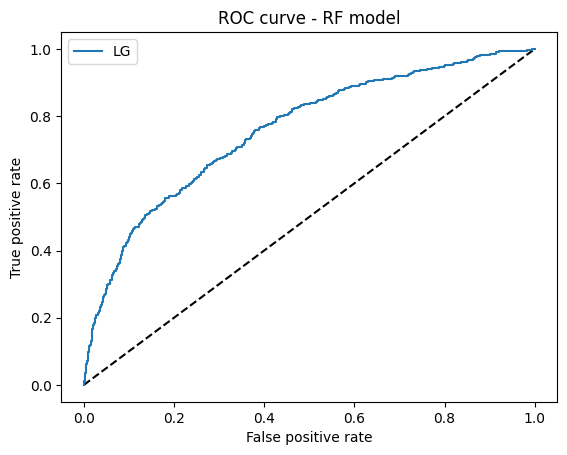

In [87]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='LG')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

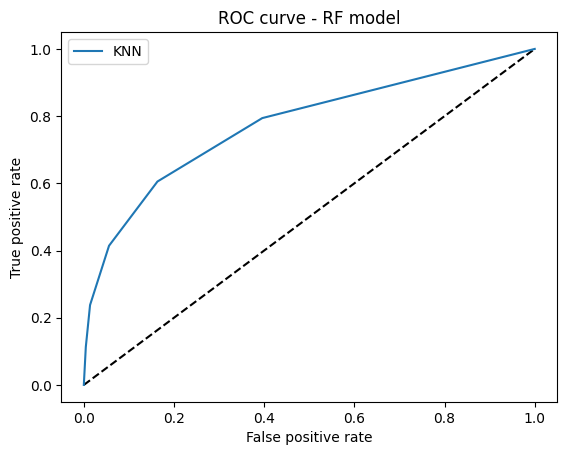

In [88]:
y_pred_KNN_pro = classifier_KNN.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_KNN_pro)
classifier_KNN.predict_proba(X_test)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='KNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

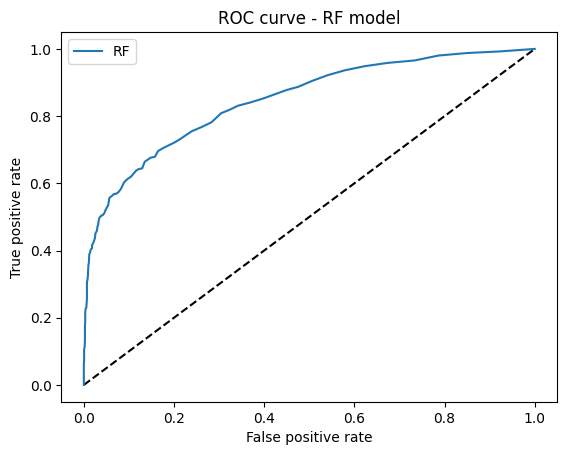

In [89]:
y_pred_RF_pro = classifier_RF.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_RF_pro)
classifier_RF.predict_proba(X_test)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

## **Random Forest Model - Feature Importance Discussion**

In [90]:
X_RF = X.copy()

X_RF = OneHotEncoding(X_RF, enc_ohe, ['Geography'])
X_RF['Gender'] = enc_oe.transform(X_RF[['Gender']])

X_RF.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0.0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,0.0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,0.0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,0.0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,0.0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0


In [92]:
forest = RandomForestClassifier()
forest.fit(X_RF, Y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X_RF.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
Age : 0.24
EstimatedSalary : 0.1466
Balance : 0.1441
CreditScore : 0.1435
NumOfProducts : 0.1278
Tenure : 0.0825
IsActiveMember : 0.0398
Geography_Germany : 0.0197
HasCrCard : 0.0183
Gender : 0.0182
